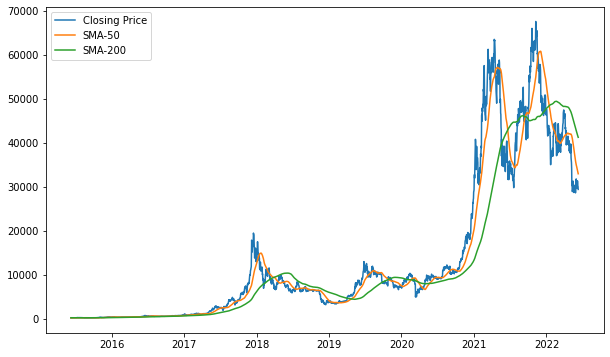

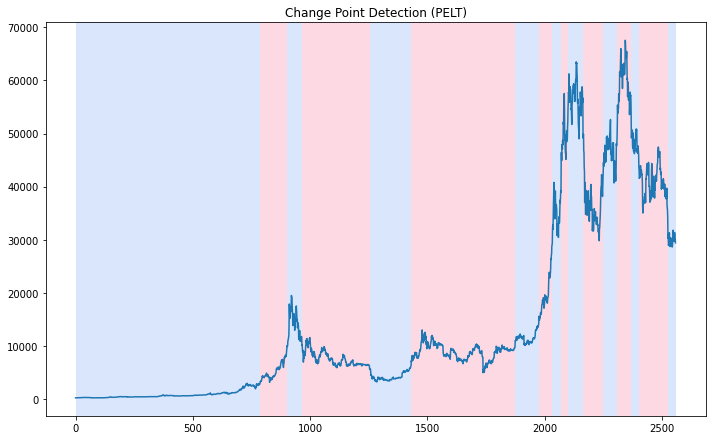

In [5]:
import changepoint as cp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import ruptures as rpt
import sma
from datetime import datetime, timedelta
from walk import Walk

DATA_FILE = "./data/BTC-USD.csv"
df = pd.read_csv(DATA_FILE)

# Read configuration input
cfgStartDate = "2015-06-10"
cfgEndDate = "2022-06-10"

# Only extract Date and Closing Price
df = df[["Date", "Close"]]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.index = df.pop("Date")

# Add SMA for 50 days
dfSMA50 = sma.aggregateDfWithSMA(df, cfgStartDate, cfgEndDate, n=50)
dfSMA50.index = dfSMA50.pop("Date")

# Add SMA for 200 days
dfSMA200 = sma.aggregateDfWithSMA(df, cfgStartDate, cfgEndDate, n=200)
dfSMA200.index = dfSMA200.pop("Date")

# Get Death Crosses
crosses, dfCrosses = sma.getDeathCrosses(dfSMA50, dfSMA200)

# Get Change Point Dates
dfClose = np.array(df.loc[cfgStartDate:cfgEndDate]["Close"])
changePoints = cp.detectChangePoint(dfClose)
dates = cp.getChangePointDates(dfCrosses, changePoints)

# Walk and back test
w = Walk(df, crosses, dates)
w.walk()

# Plot SMAs
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(dfSMA50["Close"])
plt.plot(dfSMA50["SMA-50"])
plt.plot(dfSMA200["SMA-200"])
plt.legend(["Closing Price", "SMA-50", "SMA-200"])
plt.show

# Plot change points
fig, (ax1,) = rpt.display(dfClose, changePoints, figsize=(10, 6))
plt.title("Change Point Detection (PELT)")
plt.show()
